In [6]:
import sys
sys.path.append('/home/zinserlab/bin/Bio_workbench')
import finditfasta
import Bioscan
from IPython.display import Image
import pandas as pd
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Defining RM types (5-3-2018)

Each RM system type will be represented by different domain archtectures, sizes, and genomic architectures, thus making them difficult to classify. In this notebook, we will aim to define explicitly what will be a Type I, Type II, TypeIII, Type IV, and TypeIIG Restriction Modificaiton systems. We will attempt to first generalize what kinds of protein profiles we see in the methyltransferases (M), endonucleases (R) and any possible specificity subunits (S). We will then try and determine additonal pieces of information we may be able to use for catagorization.

![https://www.ncbi.nlm.nih.gov/books/NBK63963/](figures/ch5294f2.jpg)
Fig 1. Picture is from the [Madame Curie Bioscience Database](https://www.ncbi.nlm.nih.gov/books/NBK63963/) and used to illistrate different kinds of RM systems. TRD: target recognition domain. Note that black TDR are from detectable Methylase_S domains, while those in gray are not typically detectable through HMMs

A) Type I RM systems are composed of 3 subunits, endonuclease, methyltransferase and specificity subunit. S and M complex together for methyltransferase activity, while RMS are required for endonuclease activity


B) Type II RM systems are the 'clasic' RM systems- seperate endonucleases and methyltransferase activity that independantly recoginze DNA.


C) Type IIG are RM systems where all elements are concatinated together, but we see Methylase_S domains


D) Another version of TypeIIG where we see detectable specificty subunit


F) Type III RM that come together to form endonuclease activity


G) TypeIV RM systems that degrade methylated DNA

## Defining RM 
We will first use our curated database to search the oringal protein dataset to produce all domains in each biochemically characterized protein

In [4]:
##path variables##
gb_dir='/home/spiridon/Documents/Databases/RM/'
probelibrary= '/home/spiridon/Documents/Databases/RM/non-putative_rebase.fasta'
HMM_searchspace= '/home/spiridon/Documents/Databases/RM/RMwithFalsepos.hmm'
BLASTexceptions= '/home/spiridon/Documents/Databases/RM/BLASTexceptions.fasta'
results= '/home/spiridon/Documents/Databases/RM/definitions/data/'
falsepos='/home/spiridon/Documents/Databases/RM/Falsepos_HMMs.txt'


Bioscan.Search_Strategies.Comprehensive_Scan(target_dir=gb_dir,results_dir=results,probelibrary=probelibrary,
                                     HMM=HMM_searchspace,BLASTexceptions=BLASTexceptions,threads=3,
                                     FalsePositiveHMMs=falsepos,TenativePositiveHMMs_list=['ResIII'])

In [10]:
gb_dir="/media/zinserlab/4TbWesterDigital/Databases/RM/"
gold_standard = pd.read_csv('data/non-putative_rebase.bioscan.csv',sep='\t')
fasta = finditfasta.Fasta(gb_dir+'non-putative_rebase.fasta')
#we need to find the type of each accession
accession_enztype={}
type_length=[]
for entry in fasta:
    headerdat = entry.split()
    accession=headerdat[0][1:]
    for el in headerdat:
        if 'EnzType' in el:
            enztype=el[1:-1].split('=')[1]
            accession_enztype[accession] = el[1:-1].split('=')[1]
            type_length.append([enztype,len(fasta[entry])])
enztype = [accession_enztype[accession] for accession in gold_standard['#accession']]
enztypes=set(enztype)
gold_standard.insert(loc=5,column='EnzType', value=enztype)
def subset_df(df,enztype):
    return (df.loc[gold_standard['EnzType'] == enztype])
gold_standard

,#accession,Domain(s)Found,length,product,TopBLAST;evalue;bitscore,EnzType
0,M.AacDam,MethyltransfD12,284,NaN,NaN,Type_II_methyltransferase
1,M.Aap10433I,HsdM_N;N6_Mtase,515,NaN,NaN,Type_I_methyltransferase
2,S.Aap10433I,Methylase_S;Methylase_S,425,NaN,NaN,Type_I_specificity_subunit
3,M.Aap10433III,DNA_methylase,360,NaN,NaN,Type_II_methyltransferase
4,AatII,NaN,345,NaN,AatII;0.0;703.0,Type_II_restriction_enzyme
5,M.AatII,N6_N4_Mtase,331,NaN,NaN,Type_II_methyltransferase
6,M.AauTCI,N6_N4_Mtase,304,NaN,NaN,Type_II_methyltransferase
7,M.Aba63I,HsdM_N;N6_Mtase,666,NaN,NaN,Type_I_methyltransferase
8,S.Aba63I,Methylase_S;Methylase_S,440,NaN,NaN,Type_I_specificity_subunit
9,M.Aba78I,HsdM_N;N6_Mtase,758,NaN,M1.Mma5219I;2.33e-49;178.0,Type_I_methyltransferase


In [11]:
print('Possible enztypes in rebase: '+str(enztypes))

enztype_typeactivity={'Type_I_restriction_enzyme':[1,'R'], 'Type_IV_methyl-directed_restriction_enzyme':[4,'R'], 
                      'Type_I_specificity_subunit':[1,'S'], 'Type_II_restriction_enzyme':[2,'R'], 
                      'Type_III_methyltransferase':[3,'M'], 'Type_III_restriction_enzyme':[3,'R'], 
                      'Type_I_restriction_enzyme/methyltransferase':[1,'RM'], 'Type_II_methyltransferase':[2,'M'], 
                      'Type_IIG_restriction_enzyme/methyltransferase':[2,'RM'], 
                      'Type_I_methyltransferase':[1,'M'], 'Type_II_specificity_subunit':[2,'S']}

def quantify_domainfrequency(dataframe,enztype):
    domain_num={'NA':0}
    total=0
    for row in dataframe.itertuples():
        if row[-1] == enztype:
            total+=1
            if pd.isnull(row[2]):
                domain_num['NA']=domain_num['NA']+1
            else:
                #doing a set so we do not double count domains. While some proteins will have multiple
                #domains (for example, many TypeI specificity subunuits have 2 Methylase_S)
                #we are just looking for presence
                domains = set(row[2].split(';')) 
                for domain in domains:
                    if domain in domain_num:
                        domain_num[domain]=domain_num[domain]+1
                    else:
                        domain_num[domain]=1
    out=[]
    for el in domain_num:
        out.append([el,domain_num[el]/total,total])
    return(out)
m=[]
#lets quantify the frequency of a domain for each enztype, then add the type and activity data
for el in enztypes:
    temp=quantify_domainfrequency(gold_standard,el)
    for line in temp:
        m.append(enztype_typeactivity[el]+line)

#we will split m into types, where the columns are as follows: activity,domain,activty_frequency
type_dat={}
for line in m:
    if line[0] in type_dat:
        type_dat[line[0]].append(line[1:])
    else:
        type_dat[line[0]] = [line[1:]]

Possible enztypes in rebase: {'Type_I_specificity_subunit', 'Type_I_restriction_enzyme/methyltransferase', 'Type_IIG_restriction_enzyme/methyltransferase', 'Type_I_methyltransferase', 'Type_II_methyltransferase', 'Type_IV_methyl-directed_restriction_enzyme', 'Type_III_methyltransferase', 'Type_I_restriction_enzyme', 'Type_III_restriction_enzyme', 'Type_II_restriction_enzyme', 'Type_II_specificity_subunit'}


In [91]:
#we will explore the distribution of domains in Type I
df_t1 = pd.DataFrame(type_dat[1])
df_t1.columns=['activity','domain','frequency','total']
S=df_t1[df_t1['activity'] =='S']
M=df_t1[df_t1['activity'] =='M']
RM=df_t1[df_t1['activity'] =='RM']
R=df_t1[df_t1['activity'] =='R']

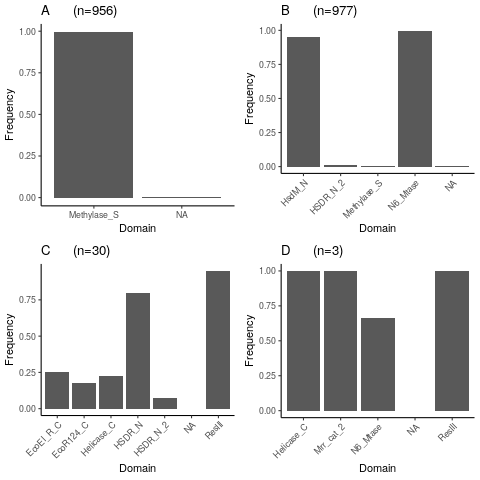

In [92]:
%%R -i S,M,RM,R
library('ggplot2')
library('gridExtra')
A<-ggplot(S, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='A\t(n=956)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))
B<-ggplot(M, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='B\t(n=977)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=45,hjust=1))
C<-ggplot(R, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='C\t(n=30)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=45,hjust=1))
D<-ggplot(RM, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='D\t(n=3)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=45,hjust=1))

gridplt<-grid.arrange(A,B,C,D,nrow=2)

ggsave('figures/TypeI.png',plot = gridplt, device='png')

In [93]:
#we will explore the distribution of domains in Type II
df_t2 = pd.DataFrame(type_dat[2])
df_t2.columns=['activity','domain','frequency','total']
S=df_t2[df_t2['activity'] =='S']
M=df_t2[df_t2['activity'] =='M']
RM=df_t2[df_t2['activity'] =='RM']
R=df_t2[df_t2['activity'] =='R']

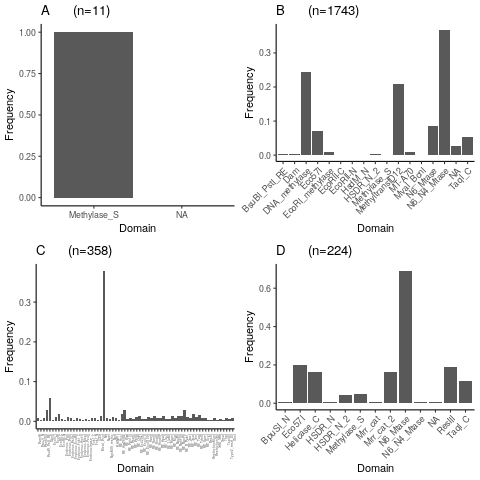

In [94]:
%%R -i S,M,RM,R
library('ggplot2')
library('gridExtra')
A<-ggplot(S, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='A\t(n=11)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))
B<-ggplot(M, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='B\t(n=1743)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=45,hjust=1))
C<-ggplot(R, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='C\t(n=358)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=90,hjust=1,size=3))
D<-ggplot(RM, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='D\t(n=224)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=45,hjust=1))

gridplt<-grid.arrange(A,B,C,D,nrow=2)

ggsave('figures/TypeII.png',plot = gridplt, device='png')

In [95]:
df_t3 = pd.DataFrame(type_dat[3])
df_t3.columns=['activity','domain','frequency','total']
M=df_t3[df_t3['activity'] =='M']
R=df_t3[df_t3['activity'] =='R']
df_t3

,activity,domain,frequency,total
0,M,NA,0.00000,338
1,M,N6_N4_Mtase,1.00000,338
2,M,TypeIII_RM_meth,0.06213,338
3,R,NA,0.00000,19
4,R,ResIII,1.00000,19


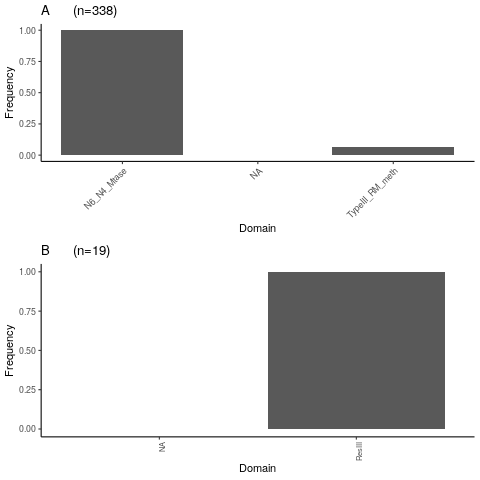

In [96]:
%%R -i R,M
library('ggplot2')
library('gridExtra')

A<-ggplot(M, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='A\t(n=338)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=45,hjust=1))
B<-ggplot(R, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title='B\t(n=19)')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=90,hjust=1,size=7.5))


gridplt<-grid.arrange(A,B,nrow=2)

ggsave('figures/TypeIII.png',plot = gridplt, device='png')

In [99]:
df_t4 = pd.DataFrame(type_dat[4])
df_t4.columns=['activity','domain','frequency','total']
df_t4

,activity,domain,frequency,total
0,R,NA,0.333333,9
1,R,Mrr_N,0.444444,9
2,R,Mrr_cat,0.555556,9
3,R,RE_NgoFVII,0.111111,9
4,R,ResIII,0.111111,9
5,R,PLDc_2,0.111111,9
6,R,Helicase_C,0.111111,9


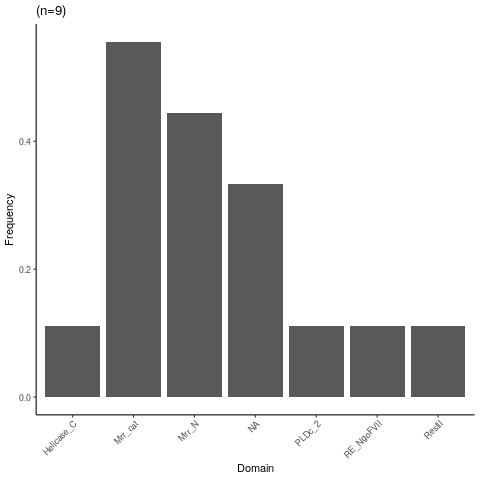

In [100]:
%%R -i df_t4

A<-ggplot(df_t4, aes(y=frequency,x=domain))+
  geom_bar(stat = "identity")+
  labs(y="Frequency",x="Domain",title="(n=9)")+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),
       axis.text.x  = element_text(angle=45,hjust=1))
print(A)
ggsave('figures/TypeIV.png',plot = A, device='png')

In [70]:
#We will now look at the sizes of different proteins
sizedf = pd.DataFrame(type_length)
sizedf.columns = ['type', 'length']
sizedf['type'] = [el.replace('_',' ') for el in sizedf['type']]
sizedf

,type,length
0,Type II methyltransferase,284
1,Type I methyltransferase,515
2,Type I specificity subunit,425
3,Type II methyltransferase,360
4,Type II restriction enzyme,345
5,Type II methyltransferase,331
6,Type II methyltransferase,304
7,Type I methyltransferase,666
8,Type I specificity subunit,440
9,Type I methyltransferase,758


In [102]:
%%R -i sizedf
library(ggplot2)
length <- as.numeric(sizedf[,2])
type <- sizedf[,1]


plt<-ggplot(sizedf, aes(length, color = type)) + geom_density(aes(group=type))+ 
  scale_color_brewer(palette='Paired')+
  theme_bw()+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))
ggsave('figures/RM_sizes.png',plot = plt, device='png')

In [17]:
#looking at correlation of type II MTase
domains=[]
for row in gold_standard.itertuples():
    if row[-1] == 'Type_II_methyltransferase':
        domains.append(row[2])
TIIM_domains = set()
for el in domains:
    if pd.isnull(el):
            TIIM_domains.add('NA')
    else:
        for dom in el.split(';'):
            TIIM_domains.add(dom)

#we need to build the dataframe            
dom_dat={}
for el in TIIM_domains:
    dom_dat[el]=[]
for row in gold_standard.itertuples():
    if row[-1] == 'Type_II_methyltransferase':
        if pd.isnull(row[2]): #taking care of NA
            for el in TIIM_domains:
                if el == 'NA':
                    dom_dat['NA'].append(1)
                else:
                    dom_dat[el].append(0)
        else:
            doms = set(row[2].split(';'))
            for el in TIIM_domains:
                if el in doms:
                    dom_dat[el].append(1)
                else:
                    dom_dat[el].append(0)
T2M=pd.DataFrame(dom_dat)
        
T2M


,BsuBI_PstI_RE,DNA_methylase,Dam,Eco57I,EcoRII-C,EcoRII-N,EcoRI_methylase,HSDR_N_2,HsdM_N,MT-A70,Methylase_S,MethyltransfD12,MvaI_BcnI,N6_Mtase,N6_N4_Mtase,NA,TaqI_C
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
%%R -i T2M
#
#Correlary data showing the TypeII M domains are not found together
#
print(cor.test(T2M[,2],T2M[,12]))#DNA_methylase, MethyltransfD12
print(cor.test(T2M[,2],T2M[,14]))#DNA_methylase, N6_Mtase
print(cor.test(T2M[,2],T2M[,15]))#DNA_methylase, N6_N4_Mtase

print(cor.test(T2M[,12],T2M[,14])) #MethyltransfD12, N6_Mtase
print(cor.test(T2M[,12],T2M[,15])) #MethyltransfD12, N6_N4_Mtase

print(cor.test(T2M[,14],T2M[,15]))#N6_Mtase, N6_N4_Mtase




	Pearson's product-moment correlation

data:  T2M[, 2] and T2M[, 12]
t = -12.722, df = 1741, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3340159 -0.2480825
sample estimates:
       cor 
-0.2916375 


	Pearson's product-moment correlation

data:  T2M[, 2] and T2M[, 14]
t = -6.9053, df = 1741, p-value = 6.999e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2086252 -0.1172192
sample estimates:
       cor 
-0.1632726 


	Pearson's product-moment correlation

data:  T2M[, 2] and T2M[, 15]
t = -19.75, df = 1741, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4654291 -0.3886819
sample estimates:
       cor 
-0.4278264 


	Pearson's product-moment correlation

data:  T2M[, 12] and T2M[, 14]
t = -6.5631, df = 1741, p-value = 6.935e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confide

In [19]:
%%R -i T2M
#
#Correlary data showing the TypeII M domains are not found together, specifically for Eco57I
#
print(cor.test(T2M[,3],T2M[,2]))#DNA_methylase
print(cor.test(T2M[,3],T2M[,12]))#MethyltransfD12
print(cor.test(T2M[,3],T2M[,14]))#N6_Mtase
print(cor.test(T2M[,3],T2M[,15]))#N6_N4_Mtase




	Pearson's product-moment correlation

data:  T2M[, 3] and T2M[, 2]
t = -1.2754, df = 1741, p-value = 0.2023
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07739343  0.01642310
sample estimates:
        cor 
-0.03055245 


	Pearson's product-moment correlation

data:  T2M[, 3] and T2M[, 12]
t = -1.1463, df = 1741, p-value = 0.2518
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07431725  0.01951608
sample estimates:
        cor 
-0.02746108 


	Pearson's product-moment correlation

data:  T2M[, 3] and T2M[, 14]
t = -0.6793, df = 1741, p-value = 0.497
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06318175  0.03069741
sample estimates:
        cor 
-0.01627805 


	Pearson's product-moment correlation

data:  T2M[, 3] and T2M[, 15]
t = -1.7041, df = 1741, p-value = 0.08855
alternative hypothesis: true correlation is not equal to 0
95 percent conf

In [20]:
for row in gold_standard.itertuples():
    if row[-1] == 'Type_IIG_restriction_enzyme/methyltransferase':
        if not pd.isnull(row[2]):
            if 'N6_Mtase' not in row[2]:
                print(row)

Pandas(Index=68, _1='AcuI', _2='Eco57I;TaqI_C', length=1000, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=177, _1='AspNIH4III', _2='Eco57I', length=1183, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=275, _1='Bbr11I', _2='Eco57I;TaqI_C', length=1103, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=286, _1='Bbr51I', _2='Eco57I;TaqI_C', length=1110, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=290, _1='Bbr52II', _2='Eco57I;TaqI_C', length=1110, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=301, _1='Bbr215I', _2='Eco57I;TaqI_C', length=1110, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=420, _1='BkrAM31DI', _2='Eco57I', length=1192, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=4

In [21]:
for row in gold_standard.itertuples():
    if row[-1] == 'Type_IIG_restriction_enzyme/methyltransferase':
        print(row)

Pandas(Index=23, _1='Aba6411II', _2='N6_Mtase', length=1177, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=26, _1='Aba7804II', _2='N6_Mtase', length=1155, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=36, _1='AbaB8342IV', _2='N6_Mtase', length=1170, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=54, _1='Acc65V', _2='N6_Mtase', length=1055, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=65, _1='Aco12261II', _2='N6_Mtase;TaqI_C', length=1148, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=68, _1='AcuI', _2='Eco57I;TaqI_C', length=1000, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pandas(Index=71, _1='Adh6U21I_(Adh6U21IA)', _2='N6_Mtase;N6_Mtase', length=648, product=nan, _5=nan, EnzType='Type_IIG_restriction_enzyme/methyltransferase')
Pa

# Results

### Type I Endonucleases
Endonucleases are typically characterized by a ResIII,HSDR_N, or HSDR_N_2 domains. We also see several endonucleases having [EcoEI_R_C](http://pfam.xfam.org/family/EcoEI_R_C) and [EcoR124](http://pfam.xfam.org/family/EcoR124_C), which are commonly found at C terminus of Type I endonucleases. While EcoEI_R_C is reported to be found in the Res subunit of Type III, we do not find any chemically characterized Res subunits containing this domain.
### Type I Methyltransferases
Nearly 100% of type I methyltransferases contain a HsdM_N domain (N for N-terminus) and all contain a N6_Mtase 100% of the time
### Type I Specificity Subunit
nearly 100% of these proteins are detected with Methylase_S
### Type II Endonucleases
These are the most diverse catagory. We see that most endonucleases do not have protein profiles and will result in being detected with blast
### Type II Methyltransferases
nearly 100% of these proteins were detected with DNA_methylase, methyltransfD12, N6_Mtase, or N4_N4_Mtase. We also tested the correlation of these data, and in every case, all have significant negative correlation with each other. This suggests that they are exclusive
### Type IIG RM
These proteins have a detectable N6_MTase nearly 70% of the time, and 20% have a Eco27I domina. The last few contain a helicase, ResIII, and Mrr domain. These proteins, however, are massive. They are between 1000-1500 amino acids.
### Type III Methyltransferases
Type III methyltransferases are typically bigger and all are found with N6_N4_Mtase
### Type III Endonuclase
ResIII is the only domain that is able to detect this methyltransferase
### Type IV
Mrr protines give clear indication of methyldegrading endonuclease. 



## Finishing thoughts
It is clear that we can use certian aspects of each RM system to determine their type. The importance in determining type is that each have certain implications. 
- R and M that target DNA independently of each other will have a difficult time changing the target recognition domain. This is because if the a endonuclase or methyltransferase devate from eachothers recognition sequence, the endonuclase will begin to digest the host genome, resulting in cell death
- When R and M complext together in either Type I or Type III systems, this problem is avoided. For example, in type I systems, TRD is determined by the specificity subunit, therefore, mutations targeting this subunits will not degrade the system.
- Specificity subunits typically usually have 2 Methylase_S domains, one by the N and other by the C terminus. The flanking DNA in the gene around these motifs are prone to homologous recombination, allowing for diversification of Type I systems 


### Machine Learning?
This is probably a good problem for machine learning. We can feed machine learning algorithms data of what RM domains are detected, top blast hit, and protein size to try and catagorize 

### Hard-Coded algorithm for classification 
Our data shows that, by far, methyltransferase domains are the easiest to detect. For each methyltransferase, the flanking genomic region will be scaned to look for specificity subunits and endonucleases.
We can help define our classification algorithm based on the following assumptions:
- Type II M dont have HsdM_N domains, yet Type I RM systems do (although not always)
- Only Type I RM systems use specificity domains
- Type III endonucleases seem to only contain ResIII
- Type IIG proteins are massive, nearly all are >750 AA

Because we have a limited dataset, we should full expect to find interesting combintations of proteins and domain architectures, we should not be too stringent on how we design classification. For examle, it might be possible to have a Type I endonucleases next to a Type I methyltransferase with a concatinated Methylase_S domain.




# Finding the phylogenetic source of our proteins
We will use the reference data protein data to try and pull genus names of the organisms the RM component was isoalted from. Our goal is to show that most of these enzymes are from proteobacteria

In [114]:
prot_org={}
with open('data/parsrefs.txt','r') as f:
    fields = ['']*8
    for line in f:
        line=line.strip()
        if line:
            fields[int(line[1])-1] = line.split('>')[-1]
        else:
            if fields[0]:
                prot_org[fields[0]] =fields[2]
            if fields[1]:
                prot_org[fields[1]] =fields[2]
with open('data/RMsource.csv','w') as f:
    for prot in prot_org:
        f.write(prot+'\t'+prot_org[prot]+'\n')